In [115]:
import tensorflow as tf
print(tf.__version__)

1.14.0


# 데이터타입

In [3]:
hello = tf.constant('Hello, TensorFlow!')
# tensorflow - constant, variables, placeholder
sess = tf.Session()
print(hello) # tesorflow의 데이터는 직접확인 불가
print(sess.run(hello)) # numpy 데이터로 변경

Tensor("Const_1:0", shape=(), dtype=string)
b'Hello, TensorFlow!'


In [7]:
x = tf.constant(35, name = 'x') # 상수선언
# 변수에 이름을 한번더 주는 이유
# 모델의 그래프 구조 확인
# 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해서
# 모델에 저장한 걸 로딩할때 메모리 위치가 저장했던 위치가 다를 수 있다. 그래서 name = 'x'에 저장된 걸로 확인

y = tf.Variable(x+5, name = 'y') # 변수(Variable)가 있는 경우 - 반드시 초기화 필요

print(y)

<tf.Variable 'y_2:0' shape=() dtype=int32_ref>


In [5]:
model = tf.global_variables_initializer() # 변수초기화
# 여기까지 모델 만듬
# 그 다음은 학습 시키는 과정
with tf.Session() as session :  # with안에서 초기화하면 with 끝나면 자동으로 사라짐(session은 끝나면 사라짐)
    session.run(model)
    print(session.run(y))

40


pandas에서 데이터 초기화(list, dict)
tesorflow 도 list에서 초기화

# 요소끼리 계산(배열 연산)

In [9]:
a = tf.constant([1,2,3], name = 'a') # GPU공간
b = tf.constant([4,5,6], name = 'b')
add_op = a+b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


# 데이터 주입

In [19]:
# 자료구조 : Graph로 구성 - 골격(구조) 형성
a = tf.placeholder(tf.int16) # 데이터 없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)

In [20]:
with tf.Session() as sess:
#     print("feed 변수합 : %i" %sess.run(add, feed_dict={a:2, b:3})) # 데이터 주입 호출
#     print("feed 변수곱 : %i" %sess.run(mul, feed_dict={a:2, b:3}))
    print("feed 변수곱 : %i" %sess.run(total, feed_dict={a:2, b:3})) # add, mul을 없애도 출력, 위에서 골격을 만들었기 때문

feed 변수곱 : 30


# 행렬의 곱

In [21]:
matrix1 = tf.constant([[3., 3.]]) # constant하면 값을 바꿀수 없다. 1x2
matrix2 = tf.constant([[2.], [2.]]) # 2x1
product = tf.matmul(matrix1, matrix2) # matrix multiply 1x1
# 여기까지는 결과가 안 들어있음
with tf.Session() as sess: # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


# 분포 초기화

In [38]:
zeros = tf.zeros([2,2])
ones = tf.ones([6])
uniform = tf.random_uniform([3,3,3], minval = 0.0, maxval = 10) # 균등분포
normal = tf.random_normal([3,3,3], mean = 0.0, stddev = 2.0)    # 정규분포
trunc = tf.truncated_normal([2,2], mean = 5.0, stddev=1.0)      # 표준편차 2배수 내의 것으로 초기화
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [39]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(sess.run(trunc))
print("변수초기화", sess.run(random_var))

[[4.2191577 5.721522 ]
 [5.625405  6.3582935]]
변수초기화 [[ 0.9130345   0.84750086]
 [ 0.09099925 -0.17798285]]


In [42]:
import tensorflow as tf
my_tensor = tf.constant(0, shape = [6,2]) # 6x2행렬 => 값을 바꿀수 없는 상수화
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # class
print(my_static_shape)       # 내용은 확인 불가, run으로 확인

my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


# 대화형 세션

In [43]:
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())         # run

[0. 0.]


In [44]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # chaining
    print(t.eval())
    sess.close()

In [46]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.constant([2.3, 4.5]), tf.Variable([-2, 3, 5])
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3])) # 여러개를 더할 수 있도록 add_n

[ 3.5 10.1]
[-8  5 17]


# 방정식 구하기
# 2x + y + z = 1
# 4x + 3y + 4z = 2
# -4x + 2y + 2z = -6
# A dot x = [1, 2, -6]  (행렬 나누기 => 역행렬)
####### y
####### z


In [55]:
sess = tf.Session()
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape = [3,3])
print(sess.run(x))

y = tf.constant([1.0,2,-6], shape = [3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [56]:
z = tf.matrix_solve(x, y) # 앞에 행렬의 역행렬 구하고 뒤에 있는 행렬과 곱함
result=sess.run(z)
print("계수:", result)
print(sess.run(z))

# 2*1 + (-2)  + 1

계수: [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [57]:
print(2.0 * result[0] + 1.0*result[1] + 1.0*result[2])
print(sess.run(tf.matmul(x,z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [58]:
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y)
print("해: ", sess.run(z))

해:  [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [ ]:
# 특이행렬분해(Singular Value Decomposition) (행열이 다를 때)

In [63]:
# PCA 할 때 - 고유값 분해 eigenvalue + eigenvector (정방행렬일때만 가능)
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑음
# 정방행렬
# truncate 
s, u, v = tf.svd(a) # singular value, left singular value, right singular value    u(mxm)  s(1x2)  v(nxn)
print("1:",sess.run(s))
print("2 :", sess.run(u))
print("3 : ",sess.run(v))


1: [9.508034   0.77286935]
2 : [[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
3 :  [[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


# 대각행렬

In [64]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 - one-hot encoding
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [65]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia))) # 대각선의 합계

[1 2 3 4]
10


In [67]:
import numpy as np
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2,3])
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3,2])
c = tf.matmul(a, b)
sess.run(c)

array([[ 58,  64],
       [139, 154]])

In [ ]:
1 2 3    7  8  
4 5 6    9  10
         11 12



In [68]:
# 행열 : 행과 열을 확인, 앞의 것은 개수 [2,3,3,4] => 3x4가 6개 
a = tf.constant(np.arange(1, 13, dtype = np.int32),
               shape=[2,2,3])  # shape의 첫 숫자 빼고 나머지로 행렬 곱 판단 (2x3 2개)# 행열을 중심하고 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(13, 25, dtype = np.int32),
               shape = [2,3,2])  # 3x2 2개
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [77]:
a = tf.constant(np.arange(1, 25, dtype = np.int32),
               shape=[2,2,2,3])  
print("a : ",sess.run(a))
b = tf.constant(np.arange(25, 49, dtype = np.int32),
               shape = [2,2 ,3,2])  
print("b:",sess.run(b))
c = tf.matmul(a,b)
sess.run(c)  # 2x2가 4개

a :  [[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
b: [[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

# a를 제곱한다면 전치

In [83]:
d = tf.matmul(a,tf.transpose(a, perm=[0,1,3,2])) # [2,2,2,3] -> 0, 1, 2, 3
print("d : ",sess.run(d))
print("s :",sess.run(tf.matmul(a,a, transpose_b=True))) # 전치해서 자기제곱

d :  [[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]
s : [[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


# 차원

In [84]:
x = tf.constant([[[1, 2, 3],
                 [4, 5, 6]],
                [[7, 8, 9],     # 0 1 2
                [10, 11, 12]]]) # 2x2x3
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3x2x2 : 디폴트 2 1 0

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [85]:
y = tf.transpose(x, perm=[0, 2, 1]) # 2x3x2
print(sess.run(y))

[[[ 1  4]
  [ 2  5]
  [ 3  6]]

 [[ 7 10]
  [ 8 11]
  [ 9 12]]]


In [86]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0, 2, 1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [90]:
t=[1,2,3,4,5,6]
t=tf.reshape(t, [1,2,1,3,1,1])
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [91]:
print('t의 차원은', sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [99]:
print("차원의 수를 축소할 때", tf.shape(tf.squeeze(t))) # squeeze가 1짜리 날림

차원의 수를 축소할 때 Tensor("Shape_3:0", shape=(2,), dtype=int32)


In [100]:
# t : 1, 1, 2, 1, 3, 1, 1
print("차원 확대", tf.expand_dims(t,0)) # 차원확대

차원 확대 Tensor("ExpandDims_3:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [94]:
tensor = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(sess.run(tf.reshape(tensor, [2, -1]))) # -1 계산으로 채워라 12/2 => [2,6]

print(tf.reshape(tensor, [-1, 6])) # 12/6 => [2,6]
print(sess.run(tf.reshape(tensor, [2, -1, 3]))) #12/(2*3) => [2,2,3]

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
Tensor("Reshape_8:0", shape=(2, 6), dtype=int32)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


# 수를 채우는 방법

In [103]:
t = [[1, 2, 3], [4, 5, 6]] # 2x3
paddings = [[1, 1,],[2,2]] # padding : 충전재, 행을 위로 하나 아래로 하나, 열을 왼쪽으로 2개 오른쪽으로 2개 => 4x7
print(sess.run(tf.pad(t, paddings, "CONSTANT"))) # constant 0으로 채우기

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [104]:
paddings = [[1,1,], [1,1]]
print(sess.run(tf.pad(t, paddings, "REFLECT"))) # 중심꺼를 복사

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [105]:
print(sess.run(tf.pad(t, paddings, "SYMMETRIC"))) # 확장

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


# 다차 방정식의 해
- 무작위 대입법
- 역행렬을 구함
- 입출력 데이터만 있음 : 계수결정(가중치 학습을 통해서 학습)

In [106]:
# # 데이터로부터 규칙을 발견 -> 왜? 분류와 예측을 하기 위해서
import numpy as np
import tensorflow as tf
# 데이터 생성 => minibatch => feeding
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 # 선형방정식, 실제값
len(y_data)

100

In [112]:
# 설명력
# bias는 activation 활성화
# 가중치에는 꼭 바이어스가 하나씩 붙는다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 가중치 ,균등분포
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y = W * x_data + b # 예측치

In [108]:
# loss function : mse, 2차원인 경우 포물선을 이루고 최적점은 한 개
loss = tf.reduce_mean(tf.square(y - y_data)) # square 제곱, reduce 전부 합쳐라
optimizer = tf.train.GradientDescentOptimizer(0.5) # 경사하강법하면서 최적점 찾기, 학습률
                                                   # 기울기 : 미분을 이용해서 , (-)이면 가중치에 차를 더해주고
                                                   #                            (+)이면 가중치에 감하는 연산
train = optimizer.minimize(loss) # lose함수를 최적화 해라

In [109]:
init = tf.global_variables_initializer() # 세션을 실행하기 전
sess.run(init)

In [110]:
for step in range(201) :
    sess.run(train)
    if step % 20 ==0 : # 20번 마다
        print(step, sess.run(W), sess.run(b)) # 마지막 200번때가 최적화 0.1+0.3

0 [0.29934138] [0.2605688]
20 [0.13915165] [0.2799745]
40 [0.10880996] [0.29549384]
60 [0.10198244] [0.29898602]
80 [0.10044611] [0.29977185]
100 [0.10010038] [0.29994866]
120 [0.10002259] [0.29998845]
140 [0.1000051] [0.2999974]
160 [0.10000116] [0.29999942]
180 [0.10000027] [0.2999999]
200 [0.1000001] [0.29999995]


# 데이터를 외부에서 주입

In [163]:
x = tf.placeholder(tf.float32, name = 'x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.zeros([1]))
sess = tf.Session()
y_model = W*x + b

In [167]:
loss = tf.reduce_mean(tf.square(y_model-y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [168]:
init = tf.global_variables_initializer()
sess.run(init)

In [169]:
for step in range(201) :
    sess.run(train, {x:x_data, y:y_data})
    if step % 20 ==0 :
        print(step, sess.run(W), sess.run(b))

0 [0.57425755] [0.07013123]
20 [0.20555884] [0.24600816]
40 [0.123753] [0.2878507]
60 [0.10534494] [0.29726616]
80 [0.10120272] [0.29938483]
100 [0.10027063] [0.29986158]
120 [0.1000609] [0.29996887]
140 [0.1000137] [0.299993]
160 [0.10000309] [0.29999843]
180 [0.1000007] [0.29999965]
200 [0.10000016] [0.29999992]


In [136]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

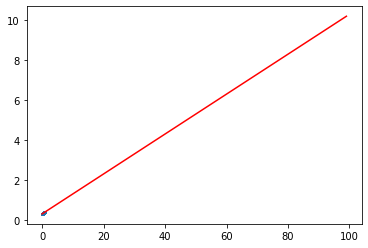

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize = 2)
plt.plot(predicted, 'r')
plt.show()

# Graph

In [178]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [179]:
sess = tf.Session()
x_vals = np.array([1., 3., 5., 7., 9.])
y_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data:x_val, y_data:y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [180]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
    
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/', sess.graph)

- tensorboard --logdir=/tmp
- http://localhost:6006/

In [183]:
rng = np.random
# 상수화할 때 좋은점 : 수정할 일이 줄어듬
learning_rate = 0.01
training_epochs = 4000
display_step = 50
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [185]:
# data point : 관측치
n_samples = train_X.shape[0] # 차수 : 행(인덱스)   / 열 : 변수개수
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(), name = 'weight') # 설명
b = tf.Variable(rng.randn(), name = 'bias')   # activation 활성화   /(노드)
activation = tf.add(tf.multiply(X, W), b)     # y = ax+b , 예측치
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) # pow(,2) 제곱, 2*n_samples : 미니배치 사이즈 고려
# 역전파 : optimizer도 하이퍼파라미터
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 하이퍼파라미터, momentum : 가는 방향을 고려
init = tf.initialize_all_variables() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch :  0001 cost =  0.099206813 W= 0.27521482 b= 0.448187
Epoch :  0051 cost =  0.083636113 W= 0.29535174 b= 0.47228536
Epoch :  0101 cost =  0.082865357 W= 0.2926304 b= 0.49186295
Epoch :  0151 cost =  0.082183771 W= 0.29007083 b= 0.5102762
Epoch :  0201 cost =  0.081581056 W= 0.28766325 b= 0.5275952
Epoch :  0251 cost =  0.081048094 W= 0.28539923 b= 0.5438837
Epoch :  0301 cost =  0.080576830 W= 0.28326967 b= 0.5592032
Epoch :  0351 cost =  0.080160119 W= 0.2812667 b= 0.5736125
Epoch :  0401 cost =  0.079791658 W= 0.27938265 b= 0.5871657
Epoch :  0451 cost =  0.079465888 W= 0.2776107 b= 0.5999129
Epoch :  0501 cost =  0.079177849 W= 0.27594432 b= 0.6119014
Epoch :  0551 cost =  0.078923255 W= 0.27437714 b= 0.6231751
Epoch :  0601 cost =  0.078698158 W= 0.27290338 b= 0.63377786
Epoch :  0651 cost =  0.078499198 W= 0.27151707 b= 0.64375013
Epoch :  0701 cost =  0.078323297 W= 0.27021334 b= 0.6531295
Epoch :  0751 cost =  0.078167789 W= 0.2689871 b= 0.661951
Epoch :  0801 cost =  0.07

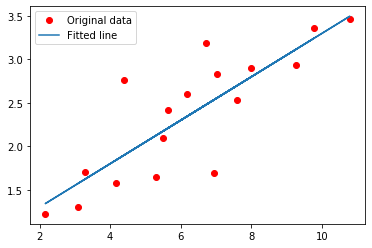

In [186]:
# 세션 연결 전까지 그래프 정의 : node(연산) + edge(데이터 전달 : tensor(배열+행렬))
# 전제조건 : GPU가 존재 => 네트워크로 연결(CPU-GPU)
with tf.Session() as sess :
    sess.run(init)
    for epoch in range(training_epochs) :  # 세대
        for(x, y) in zip(train_X, train_Y) :
            sess.run(optimizer, feed_dict={X:x, Y:y})
            # accuracy 증가해야함
        if epoch %display_step == 0:  # 50번, 비용함수는 감소해야함(우하향)
            print('Epoch : ', '%04d' %(epoch+1), "cost = ", "{:.9f}".format(sess.run(cost, feed_dict={X:train_X, Y:train_Y})),
                 "W=", sess.run(W), "b=", sess.run(b))
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b) )
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
    # predict한 결과값 출력
    plt.plot(train_X, sess.run(W)*train_X +sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()

In [187]:
# tensor -> 직접 시각화하는 것이 불가능 => numpy포맷으로 변경
def run_variable(variable) :
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [190]:
my_distribution = tf.random_uniform((600, 400), seed = 42) # 24개 너무 적어서 600 400 해서 균등 맞춤
uniform = run_variable(my_distribution)

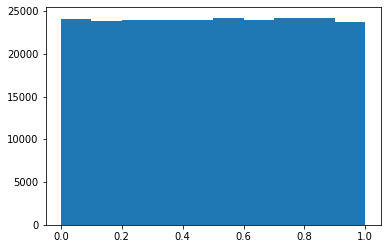

In [191]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 데이터 메모리 저장 : 1차원
plt.show()

# activation 함수 : 회귀냐 분류인가 결정
- 비선형 매핑 (선형대수 -> 비선형문제로 변경)
- 가중치를 깊게하고 활성화함수 매핑으로 XOR 문제를 해결

# 신경망은 한번 정의된 함수는 다시 못씀, 그래서 계속 리셋해줘야함

In [192]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start = -10., stop = 10, num = 100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[4.53988992e-05 5.55621925e-05 6.80006294e-05 8.32234827e-05
 1.01854002e-04 1.24654915e-04 1.52559623e-04 1.86710374e-04
 2.28504961e-04 2.79653838e-04 3.42249995e-04 4.18854392e-04
 5.12600439e-04 6.27321712e-04 7.67708042e-04 9.39496227e-04
 1.14970295e-03 1.40690911e-03 1.72160671e-03 2.10662180e-03
 2.57762963e-03 3.15378152e-03 3.85846667e-03 4.72023638e-03
 5.77392318e-03 7.06199264e-03 8.63617122e-03 1.05593993e-02
 1.29081631e-02 1.57752639e-02 1.92730804e-02 2.35373794e-02
 2.87317129e-02 3.50524161e-02 4.27341757e-02 5.20560700e-02
 6.33478781e-02 7.69963170e-02 9.34506760e-02 1.13227094e-01
 1.36910472e-01 1.65152775e-01 1.98666320e-01 2.38210660e-01
 2.84571982e-01 3.38534624e-01 4.00845440e-01 4.72173209e-01
 5.53066799e-01 6.43916968e-01 7.44927069e-01 8.56097102e-01
 9.77223714e-01 1.10791615e+00 1.24762553e+00 1.39

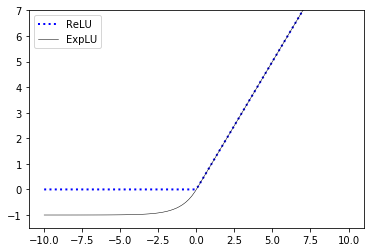

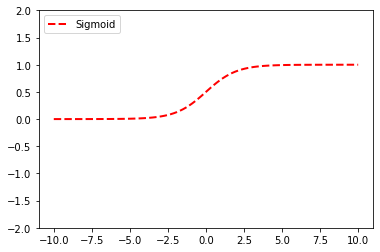

In [196]:
print(sess.run(tf.nn.relu([-3., 3.,10. ])))  # 0~ 무한대
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1., 0., 1.]))) # 0~1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1., 0., 1.])))   # -1~1
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.elu([-1., 0., 1.])))   # -1~무한대 (수정본)
y_elu = sess.run(tf.nn.elu(x_vals))
print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # 각진 단점 보안
y_softplus = sess.run(tf.nn.softplus(x_vals))
print(y_softplus)
print(y_elu)
plt.plot(x_vals, y_relu, 'b:', label = 'ReLU', linewidth = 2)
plt.plot(x_vals, y_elu, 'k-', label = 'ExpLU', linewidth = 0.5)
plt.ylim([-1.5, 7])
plt.legend(loc = 'upper left')
plt.show()
plt.plot(x_vals, y_sigmoid, 'r--', label = 'Sigmoid', linewidth =2)
plt.ylim([-2,2])
plt.legend(loc = 'upper left')
plt.show()

In [197]:
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
tf.set_random_seed(5) # 시드의 초기값
np.random.seed(42)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))

x = np.random.normal(2, 0.1, 500)
# 사이즈 fix하지 않고 입력데이터로부터 계산
x_data=tf.placeholder(shape=[None, 1], dtype=tf.float32) # shape=[None, 1] 행데이터로 생성해라

In [198]:
# y = ax + b, 0~1사이값으로 매핑
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# 0 ~ ∞
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
# 0.75로 수렴과정
# MSE
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid AND Relu 함수의 최적화 0.75')


 Sigmoid AND Relu 함수의 최적화 0.75


In [199]:
loss_vec_sigmoid = [] # 로스값을 저장
loss_vec_relu = []

In [203]:
for i in range(500) :
    # 500 -> 50
    rand_indices = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict = {x_data:x_vals})
    sess.run(train_step_relu, feed_dict = {x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict = {x_data:x_vals} ))
    loss_vec_relu.append(sess.run(loss2,feed_dict = {x_data:x_vals} ))
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    if i%50 == 0 :
        print('sigmoid =' + str(np.mean(sigmoid_output)) + '\trelu = ' + str(np.mean(relu_output)))
# 0.75 수렴하는 과정

sigmoid =0.74903303	relu = 0.7492768
sigmoid =0.74972016	relu = 0.74646974
sigmoid =0.7499535	relu = 0.74655896
sigmoid =0.74864596	relu = 0.75382453
sigmoid =0.7491845	relu = 0.75044996
sigmoid =0.74786156	relu = 0.757092
sigmoid =0.7492991	relu = 0.7519531
sigmoid =0.74979097	relu = 0.7482766
sigmoid =0.7496743	relu = 0.74895364
sigmoid =0.74910986	relu = 0.75318223


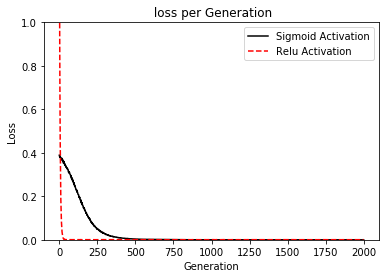

In [204]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 